In [4]:
from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import csv
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import pandas as pd

df_review = pd.read_csv("label baru.csv")
df_review.tail()

,Lebel,Tweet
358,Positif,wali kota batu dewanti rumpoko perintah desa l...
359,Negatif,warna hitam pedulilindungi ubah seringkali mun...
360,Negatif,ya allah selamat virus jahat covid ni
361,Positif,yes pandemi covid salah utama naik harga komod...
362,Negatif,yg parah kali sali pergi cepat covid marah bay...


In [6]:
df_review["Lebel"].value_counts()

Positif    207
Negatif    156
Name: Lebel, dtype: int64

In [7]:
df_review = pd.read_csv("label baru set fix.csv")
df_review

,Lebel,Tweet
0,1,ada acara tunjuk ijin satgas covid
1,1,ada diaspora sebar indonesia nilai menteri bum...
2,1,adik sd negeri tanjak iii lawan covid varian h...
3,0,ah aja yg lewat mikirnya tuh sdg ngomong ngade...
4,1,airlangga akselerasi vaksinasi disiplin prokes...
...,...,...
358,1,wali kota batu dewanti rumpoko perintah desa l...
359,0,warna hitam pedulilindungi ubah seringkali mun...
360,0,ya allah selamat virus jahat covid ni
361,1,yes pandemi covid salah utama naik harga komod...


In [8]:
df_review["Lebel"].value_counts()

1    207
0    156
Name: Lebel, dtype: int64

In [9]:
df_preprocessed = df_review.copy()
#df_preprocessed = df_preprocessed.drop(columns=['Date', 'Name'])
df_preprocessed.head()

,Lebel,Tweet
0,1,ada acara tunjuk ijin satgas covid
1,1,ada diaspora sebar indonesia nilai menteri bum...
2,1,adik sd negeri tanjak iii lawan covid varian h...
3,0,ah aja yg lewat mikirnya tuh sdg ngomong ngade...
4,1,airlangga akselerasi vaksinasi disiplin prokes...


In [10]:
print(df_preprocessed.shape)
print(df_preprocessed['Lebel'].value_counts(normalize=True))

(363, 2)
1    0.570248
0    0.429752
Name: Lebel, dtype: float64


In [11]:
df_review["Lebel"].value_counts()

1    207
0    156
Name: Lebel, dtype: int64

In [12]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

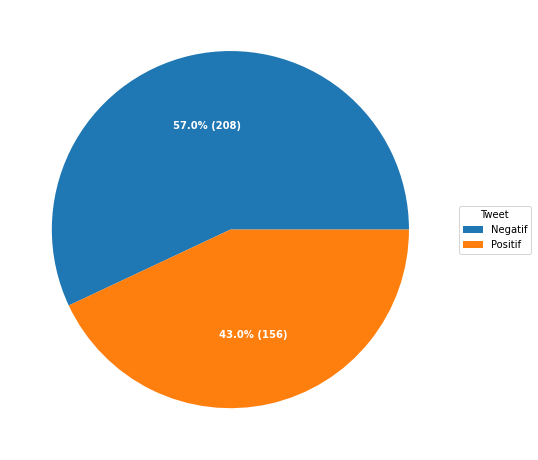

In [13]:
label = ['Negatif', 'Positif']
count_data = np.array(df_review["Lebel"].value_counts())+1

show_pie(label, count_data, "Tweet")

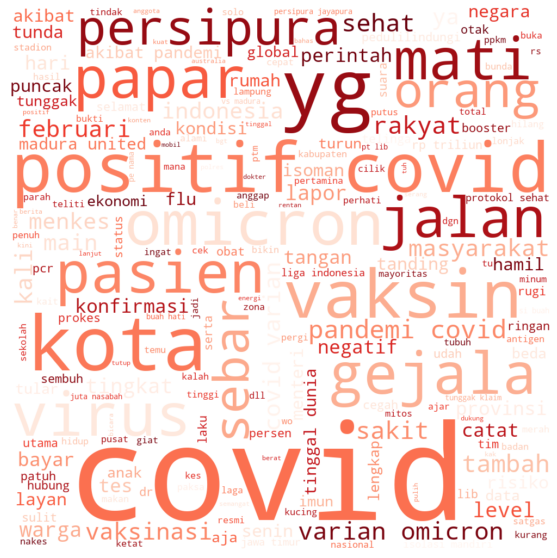

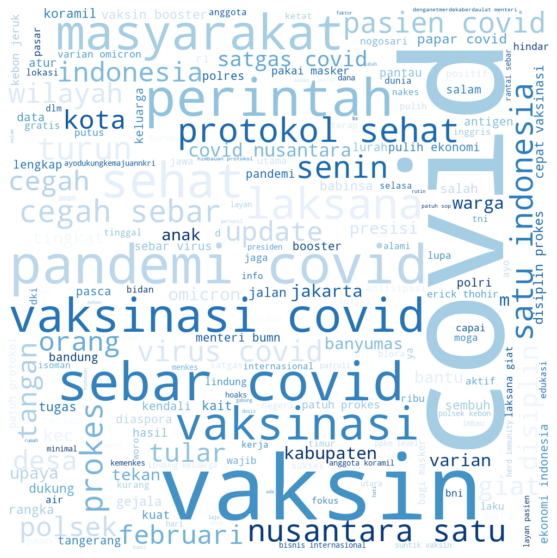

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["Lebel"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["Tweet"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["Lebel"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["Tweet"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [15]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

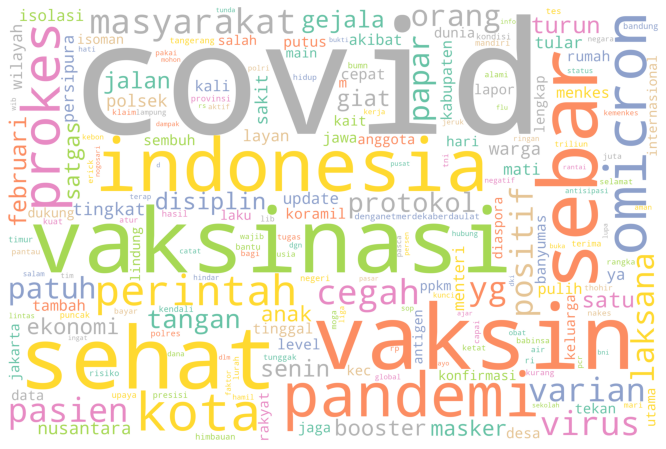

In [17]:
all_words = ' '.join([tweets for tweets in df_review['Tweet']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)